In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mne import read_epochs
from sklearn.preprocessing import LabelEncoder
from jupyterthemes.stylefx import set_nb_theme
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
set_nb_theme('gruvboxd')

In [2]:
epochs = read_epochs('nirs_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\fd\nirs_epo.fif ...
    Found the data of interest:
        t =   -4992.00 ...   19968.00 ms
        0 CTF compensation matrices available
Not setting metadata
64 matching events found
No baseline correction applied
0 projection items activated


In [3]:
epochs['rest','left']

Number of events,23
Events,left: 14rest: 9
Time range,-4.992 – 19.968 sec
Baseline,-3.000 – 0.000 sec


In [4]:
data = epochs['left','rest'].copy().crop(5,12).to_data_frame()


In [5]:
data

,time,condition,epoch,S1_D1 hbo,S1_D1 hbr,S1_D3 hbo,S1_D3 hbr,S2_D2 hbo,S2_D2 hbr,S2_D3 hbo,...,S7_D3 hbo,S7_D3 hbr,S7_D4 hbo,S7_D4 hbr,S8_D1 hbo,S8_D1 hbr,S8_D3 hbo,S8_D3 hbr,S8_D4 hbo,S8_D4 hbr
0,4.992,left,0,11.141253,-0.416566,367.111410,-405.390136,28.380138,-8.155096,104.952385,...,10.023362,4.183067,10.112264,1.004136,-669.604633,572.820078,12.174391,2.460300,152.177876,-169.391831
1,5.120,left,0,9.744435,-0.321018,74.523181,-78.616904,20.733809,0.677996,114.317350,...,9.154879,3.154280,8.640292,0.728251,-967.980013,928.536116,10.297612,3.939550,-13.116863,30.110561
2,5.248,left,0,8.096024,-0.297243,-109.971290,159.191375,11.289671,12.727043,107.591812,...,8.981996,1.468146,7.455443,0.411355,-1104.585477,1155.053964,8.825161,4.945148,-144.278121,183.620912
3,5.376,left,0,6.512740,-0.401941,-155.063695,269.802462,2.263036,25.179495,86.621265,...,9.512001,-0.327990,6.893051,0.156072,-1065.311837,1212.397357,8.079710,5.261325,-199.267437,242.634327
4,5.504,left,0,5.312511,-0.666686,-79.084413,258.250249,-4.142760,34.845329,57.608107,...,10.584647,-1.666182,7.121514,0.052824,-882.143679,1103.911549,8.232741,4.808714,-152.500215,178.728267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,11.520,left,75,16.178206,6.424546,-35.041718,-74.609161,21.032667,10.655340,112.170528,...,27.661514,4.408470,16.902570,4.196424,-40.693751,-74.249387,21.164407,0.089902,-131.651468,139.829906
1284,11.648,left,75,16.289116,6.425365,-9.277547,-98.120945,28.706314,-0.095505,117.252806,...,27.658405,5.783167,17.540842,3.850159,153.549059,-245.706324,21.074206,-0.382244,-127.021704,140.194898
1285,11.776,left,75,16.214819,6.009137,55.007094,-104.446277,38.463422,-12.970278,110.907196,...,27.030599,7.696118,17.888504,3.529493,358.994759,-418.829295,21.583965,-1.172313,-144.463032,154.358015
1286,11.904,left,75,15.893607,5.331590,154.112669,-103.171602,46.824891,-23.622220,92.474838,...,26.249703,9.606913,17.893151,3.349097,521.976966,-544.929120,22.471309,-1.993969,-171.482607,165.982972


In [6]:
hbo_cols = [col for col in data.columns if 'hbo' in col ]

In [7]:
mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
maxi = data.groupby('epoch')[hbo_cols].max()
mini = data.groupby('epoch')[hbo_cols].min()
skw = data.groupby('epoch')[hbo_cols].skew()

C:\Users\Alberto\AppData\Local\Temp\ipykernel_18120\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_18120\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_18120\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_18120\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in

In [8]:
mean

,,S1_D1 hbo,S1_D3 hbo,S2_D2 hbo,S2_D3 hbo,S2_D4 hbo,S3_D1 hbo,S3_D2 hbo,S3_D3 hbo,S4_D2 hbo,S4_D4 hbo,S5_D1 hbo,S5_D3 hbo,S6_D2 hbo,S6_D4 hbo,S7_D2 hbo,S7_D3 hbo,S7_D4 hbo,S8_D1 hbo,S8_D3 hbo,S8_D4 hbo
epoch,condition,,,,,,,,,,,,,,,,,,,,
0,left,6.177295,388.002188,15.503835,44.135897,313.916096,10.713309,240.760430,13.440433,7.453768,192.738126,11.765180,10.144202,144.985488,11.729183,24.876095,7.955300,4.899865,369.350315,6.868209,272.790540
6,left,4.343144,270.174953,11.790553,42.420607,392.516454,4.568106,142.827970,7.485904,3.165055,130.370868,6.895449,5.546091,116.914756,6.577446,30.951758,6.501825,3.600712,327.899427,4.545914,252.405762
9,rest,3.479047,476.768574,15.079288,34.783866,313.332174,3.482694,128.748505,5.418043,3.478536,122.674287,4.399149,4.643832,70.888315,3.970526,29.850659,3.962451,2.199919,415.094924,3.499512,211.853556
10,left,2.173893,232.589368,10.199758,28.868849,429.191194,2.320823,207.289908,5.691355,2.847580,125.764750,2.670461,2.717706,116.303079,3.583769,28.844537,1.879857,2.351635,414.587912,3.356589,289.992582
17,left,6.815963,249.968853,16.244116,48.713033,387.176942,3.755913,166.103814,9.176226,6.875859,130.044863,4.527668,5.966871,100.451935,7.312007,37.458909,5.826275,3.773758,332.113669,5.745061,215.379268
22,rest,7.568268,300.638006,12.409699,38.071740,311.435422,5.908548,135.643141,10.423290,6.219277,164.400032,8.558101,8.946042,151.480272,8.370608,32.874859,7.544795,5.288745,204.526413,7.435310,171.611536
24,rest,3.973304,300.738148,9.318717,25.524772,284.783939,4.527489,162.438645,4.505429,4.223338,127.968578,5.832978,4.765176,86.577423,4.520496,22.109371,6.211140,5.394993,193.587195,5.186265,209.155789
26,rest,3.676749,277.532883,14.890860,58.692057,225.416131,4.701815,196.950578,5.234803,4.833863,193.924090,4.898268,3.311328,117.195728,4.232499,28.306072,4.700743,3.488465,226.053796,4.672739,267.465634
28,left,8.054194,290.359650,14.006862,47.334475,319.480237,10.460819,166.669838,14.451513,12.957057,118.972875,12.340274,12.450599,164.931910,15.808908,26.332005,14.011246,12.292611,254.193823,12.927143,204.810455


In [9]:
grouped = mean.groupby(['epoch','condition']).count()

In [10]:
grouped.index.values
y = [i[1] for i in grouped.index.values]

In [11]:
grouped.index.values

array([(0, 'left'), (6, 'left'), (9, 'rest'), (10, 'left'), (17, 'left'),
       (22, 'rest'), (24, 'rest'), (26, 'rest'), (28, 'left'),
       (29, 'rest'), (31, 'left'), (32, 'left'), (36, 'rest'),
       (38, 'rest'), (39, 'left'), (41, 'rest'), (42, 'left'),
       (43, 'rest'), (53, 'left'), (57, 'left'), (69, 'left'),
       (73, 'left'), (75, 'left')], dtype=object)

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=34)
lda = LinearDiscriminantAnalysis()

In [14]:
scores_m = cross_val_score(lda, mean.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [15]:
scores_mx = cross_val_score(lda, maxi.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [16]:
scores_mn = cross_val_score(lda, mini.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [17]:
scores_sk = cross_val_score(lda, skw.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [18]:
scores = [scores_m, scores_mx, scores_mn, scores_sk]

In [19]:
scores_df = pd.DataFrame(data=np.transpose(scores), columns=['mean','max','min','skew'])

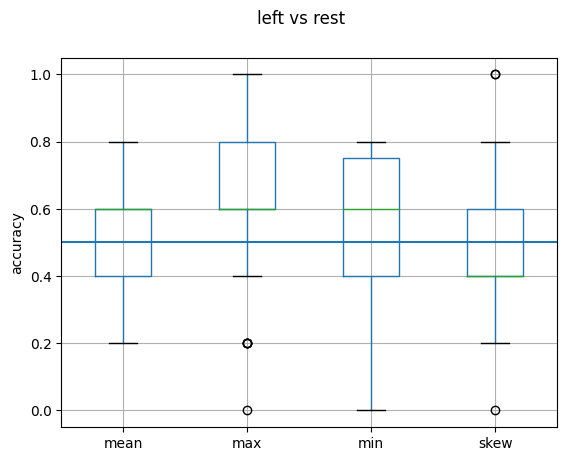

In [20]:
csp_fig, axes = plt.subplots(1)
scores_df.boxplot(ax=axes)
axes.axhline(0.5)
axes.set_ylabel('accuracy')
csp_fig.suptitle('left vs rest')
plt.show()

In [21]:
scores_df.median().to_numpy()

array([0.6, 0.6, 0.6, 0.4])